# Time series simulation
This example documents the time series data that follows with the fortitudo.tech package. There are also some examples illustrating how to use the data to compute European put and call option prices.

The data consists of a time series simulation of an equity index, a risk-free zero-coupon interest rate curve, and an implied volatility surface associated with the equity index. There are 5040 observations that represent 20 years of data with 252 trading days. The simulation can be used for, e.g., validating risk modeling approaches.

The model is fairly simple with "hand-calibrated" parameters. We keep the specification secret to avoid spoiling the fun of inferring the data generating process. We are likely to update the model with additional risk-factors and more realistic assumptions in the future, so please let us know if you see something that seems completely unrealistic in the data.

The interest rates and implied volatilities are all in percent. Hence, you likely have to divide the values by 100 when you use them for pricing. The option strikes are all relative to the forward, i.e., "1y110" is the implied volatility with 1y maturity and a strike of 110% of the 1y forward price.

NOTE: the implied volatility surface has been post-processed (numerical issues occur when one has to compute 35 * 5040 = 176,400 implied volatilities) and is not guaranteed to be arbitrage-free, so take the implied volatilities as noisy estimates of "true" implied volatilities due to both the Monte Carlo pricing and post-processing.

In [1]:
import numpy as np
import fortitudo.tech as ft
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# Load the time series data and print some observations
time_series = ft.load_time_series()
time_series.head(10)

,Equity Index,1m,3m,6m,1y,2y,3y,4y,5y,6y,...,1y102_5,1y105,1y110,2y90,2y95,2y97_5,2y100,2y102_5,2y105,2y110
0,100.000000,0.071461,0.189504,0.355075,0.649081,1.115758,1.461106,1.720412,1.918115,2.071234,...,18.951743,18.781407,18.443871,20.474077,20.175840,20.034189,19.671055,19.317585,19.180563,18.930145
1,99.049404,0.077983,0.195771,0.360984,0.654351,1.120009,1.464599,1.723333,1.920600,2.073381,...,19.884512,19.608435,19.066958,20.581206,20.239579,20.065209,20.027590,19.997435,19.852262,19.545138
2,97.912086,0.088335,0.205717,0.370361,0.662714,1.126754,1.470142,1.727970,1.924544,2.076787,...,19.139073,18.946694,18.597646,19.872560,19.582305,19.449237,19.259111,19.069730,18.951750,18.729434
3,97.568034,0.091939,0.209181,0.373626,0.665626,1.129103,1.472072,1.729584,1.925918,2.077973,...,19.698777,19.458913,18.970786,20.207967,19.872547,19.707082,19.643951,19.574303,19.419610,19.157093
4,96.462091,0.092042,0.209280,0.373719,0.665709,1.129170,1.472127,1.729630,1.925957,2.078007,...,19.115839,18.858138,18.332392,19.763631,19.443657,19.281902,19.171423,19.065091,18.923681,18.648824
5,94.964411,0.094925,0.212050,0.376331,0.668038,1.131049,1.473671,1.730922,1.927055,2.078955,...,19.758390,19.504272,19.063532,20.218818,19.941377,19.812616,19.645284,19.482806,19.375438,19.160766
6,94.571918,0.098762,0.215736,0.379807,0.671138,1.133549,1.475725,1.732640,1.928517,2.080218,...,19.688562,19.479454,19.072429,20.231858,19.985401,19.855278,19.640962,19.432067,19.307291,19.040820
7,94.275664,0.109034,0.225606,0.389111,0.679436,1.140243,1.481225,1.737241,1.932430,2.083597,...,19.048580,18.766143,18.245805,19.745948,19.392038,19.225971,19.151731,19.088500,18.948412,18.663321
8,95.021915,0.110022,0.226555,0.390006,0.680234,1.140886,1.481754,1.737683,1.932806,2.083922,...,18.931839,18.787673,18.514549,19.976130,19.660316,19.521947,19.344536,19.182929,19.063990,18.854941
9,95.720518,0.113769,0.230156,0.393400,0.683262,1.143328,1.483760,1.739361,1.934233,2.085155,...,19.300930,19.063366,18.638270,20.030980,19.653308,19.477304,19.437713,19.388473,19.230948,18.931722


# Equity Index time series plot

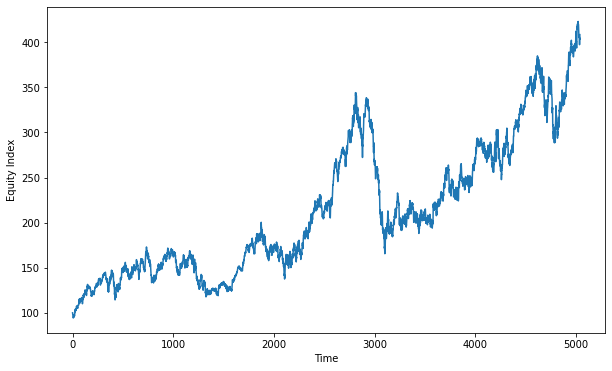

In [3]:
# Plot equity index time series
plt.figure(figsize=(10, 6))
plt.plot(time_series['Equity Index'])
plt.xlabel('Time')
plt.ylabel('Equity Index')
plt.show()

# Zero-coupon curves plots

In [4]:
# Function for plotting zero-coupon curves
def plot_zc_curve(i):
    rates_maturities = np.hstack((np.array([1/12, 1/4, 1/2]), np.arange(1, 31)))
    plt.figure(figsize=(10, 6))
    plt.plot(rates_maturities, time_series.values[i, 1:34])
    plt.xlabel('Maturity')
    plt.ylabel('Zero-coupon interest rate')

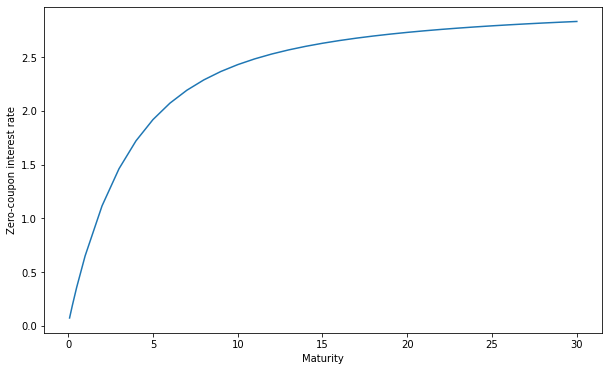

In [5]:
# Initial interst rate curve
plot_zc_curve(0)

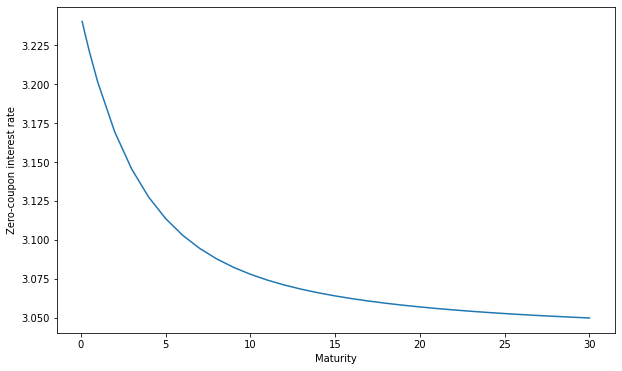

In [6]:
# An inverted interest rate curve
plot_zc_curve(900)

# Implied volatility surface plots

In [7]:
# Function for plotting vol surfaces
def plot_vol_surface(i):
    strikes = [90, 95, 97.5, 100, 102.5, 105, 110]
    maturities = [1/12, 1/4, 1/2, 1, 2]
    strikes, maturities = np.meshgrid(strikes, maturities)
    vol_surface = np.reshape(time_series.values[i, 34:], (5, 7))
    _, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))
    ax.set_xlabel('Strike', fontsize=12)
    ax.set_ylabel('Maturity', fontsize=12)
    ax.set_zlabel('Implied vol', fontsize=12)
    ax.plot_surface(strikes, maturities, vol_surface, cmap=cm.coolwarm)

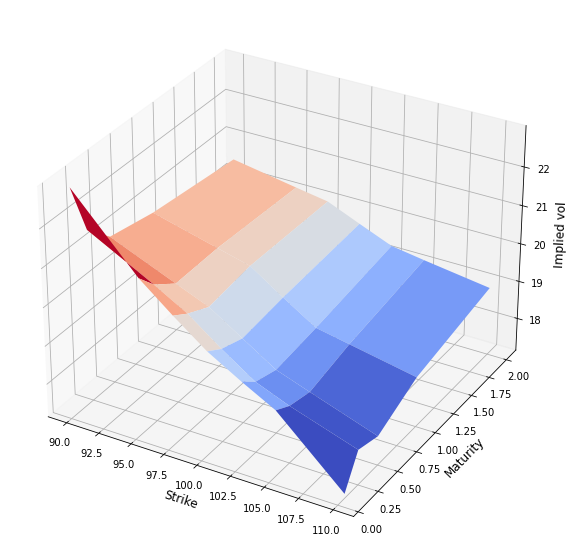

In [8]:
# Initial vol surface
surf0 = plot_vol_surface(0)

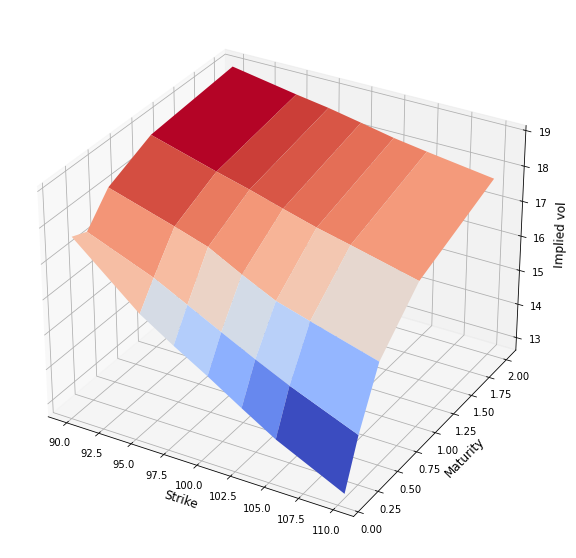

In [9]:
# Another vol surface
surf1000 = plot_vol_surface(1000)

# Option pricing examples
Below are some examples of how to price European options using the call_option and put_option functions available in this package. In addition, there are some checks of elementary European option relations.

In [10]:
# Extract parameters
i = 0
r = time_series['1y'][i] / 100
T = 1
F = np.exp(r * T) * time_series['Equity Index'][i]
sigma = time_series['1y100'][i] / 100

# Price ATMF options
call = ft.call_option(F, F, sigma, r, T)
put = ft.put_option(F, F, sigma, r, T)

# Verify that ATMF prices are the same
print(f'Difference between ATMF call and put price is {call - put} (must be equal to 0).')

# Price options with strike 105% relative to forward value
sigma_105 = time_series['1y105'][i] / 100
call_105 = ft.call_option(F, 1.05 * F, sigma_105, r, T)
put_105 = ft.put_option(F, 1.05 * F, sigma_105, r, T)

# Verify that call price < put price
print(f'Call price is {np.round(call_105, 2)} and put price is {np.round(put_105, 2)}.')

# Verify call price with put-call parity
call_105_parity = put_105 + time_series['Equity Index'][i] - np.exp(-r * T) * 1.05 * F
print(f'Call price using put-call parity is {np.round(call_105_parity, 2)}.')

Difference between ATMF call and put price is 0.0 (must be equal to 0).
Call price is 5.43 and put price is 10.43.
Call price using put-call parity is 5.43.


# License

In [11]:
# fortitudo.tech - Novel Investment Technologies.
# Copyright (C) 2021-2022 Fortitudo Technologies.

# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU General Public License for more details.

# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <https://www.gnu.org/licenses/>.